# ARIMA

In [ ]:
pip install statsmodels pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.0 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/trans.xlsx')

In [ ]:
df['Quantity'].dropna(inplace = True)
df["Quantity"].drop_duplicates(inplace = True)

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime (UTC)'])
df.set_index('DateTime', inplace=True)
df = df.sort_index()


In [ ]:
df.head()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method
DateTime,,,,,,,,
2024-01-01 00:25:35,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,18909018,1704068735,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,36.593837,Sell To Uniswap
2024-01-01 00:36:11,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,104.984275,0x415565b0
2024-01-01 00:36:11,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,0.079035,0x415565b0
2024-01-01 00:36:11,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,104.984275,0x415565b0
2024-01-01 00:51:59,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,18909149,1704070319,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,10.247435,0x415565b0


In [ ]:
target = df['Quantity'].resample('D').sum()

train_data = target[:-30]
test_data = target[-30:]

print(len(train_data))
print(len(test_data))

147
30


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(train_data)

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

if adf_result[1] <= 0.05:
  print("Reject the null hypothesis (H0). The time series is stationary.")
else:
  print("Fail to reject the null hypothesis (H0). The time series is not stationary.")

ADF Statistic: -4.43115581683401
p-value: 0.0002613314766798959
Reject the null hypothesis (H0). The time series is stationary.


In [ ]:
auto_model = auto_arima(
    train_data,
    seasonal=False,
    trace=True,
    suppress_warnings=True,
    stepwise=True
)

print(auto_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3559.782, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3592.855, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3576.171, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3577.191, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3590.858, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3573.952, Time=1.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3573.851, Time=1.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3549.679, Time=1.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3551.441, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3555.235, Time=0.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3552.967, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3555.207, Time=0.57 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=3546.389, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3550.840, Time=0.27 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=3546.490, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=3547.482, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=3545.890, Time=0.28 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=3543.900, Time=0.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3542.433, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3541.076, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3572.877, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,0,0)[0]             : AIC=3542.605, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3571.955, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0]             : AIC=3544.093, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3549.764, Time=0.13 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0]          
Total fit time: 11.375 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  147
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -1766.538
Date:                Fri, 17 Jan 2025   AIC                           3541.076
Time:                        10:04:42   BIC                           3553.010
Sample:                    01-01-2024   HQIC                          3545.925
                         - 05-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
print(auto_model.order)   ## These parameters were yeilding poor result , so we use the (5,1,3) as parameters

(0, 1, 3)


In [ ]:
arima = ARIMA(train_data, order=(5,1,3))
model_fit = arima.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  147
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -1765.273
Date:                Fri, 17 Jan 2025   AIC                           3548.547
Time:                        10:05:12   BIC                           3575.399
Sample:                    01-01-2024   HQIC                          3559.457
                         - 05-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8637      1.135      0.761      0.447      -1.361       3.088
ar.L2         -0.6580      1.030     -0.639      0.523      -2.676       1.360
ar.L3         -0.1207      0.413     -0.292      0.7

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast = model_fit.forecast(steps=len(test_data))
print(forecast)

2024-05-27      410.998569
2024-05-28    22892.257943
2024-05-29    77022.569428
2024-05-30    92589.573648
2024-05-31    66585.859330
2024-06-01    43526.667361
2024-06-02    58998.871740
2024-06-03    82869.753307
2024-06-04    78882.837360
2024-06-05    53966.072675
2024-06-06    46362.635270
2024-06-07    63974.637745
2024-06-08    78427.673506
2024-06-09    69146.308951
2024-06-10    52871.872187
2024-06-11    53993.400139
2024-06-12    68859.894820
2024-06-13    74246.136808
2024-06-14    63640.407830
2024-06-15    54336.285691
2024-06-16    59606.406466
2024-06-17    69962.176033
2024-06-18    69818.565932
2024-06-19    60703.538754
2024-06-20    56917.444212
2024-06-21    63241.997683
2024-06-22    69270.356242
2024-06-23    66339.062738
2024-06-24    59819.790023
2024-06-25    59575.255496
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
forecast.shape

(30,)

In [ ]:
#Bollinger Bands
rolling_mean = target.rolling(window=20).mean()
rolling_std = target.rolling(window=20).std()
upper_band = rolling_mean + (rolling_std * 2)
lower_band = rolling_mean - (rolling_std * 2)

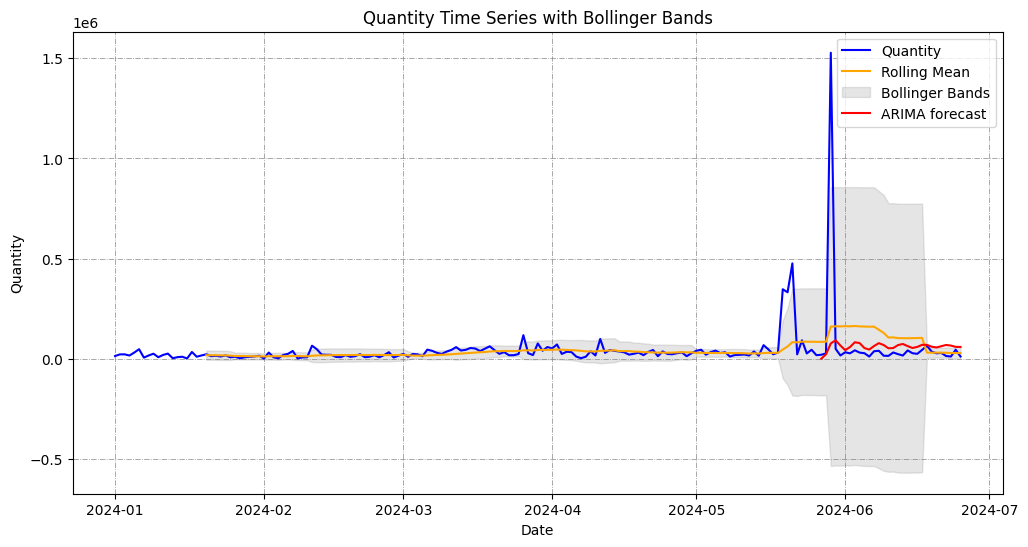

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(target, label = 'Quantity', color = 'blue')
plt.plot(rolling_mean, label = 'Rolling Mean', color = 'orange')
plt.fill_between(target.index, upper_band, lower_band, color = 'grey', alpha = 0.2,label='Bollinger Bands')
plt.plot(forecast, label = 'ARIMA forecast', color = 'red')
plt.title('Quantity Time Series with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(color='gray', linestyle='-.', linewidth=0.6, alpha=0.8)
plt.show()

# Mann-Whitney U test


In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

date = '2024-03-29'


till_29_march = df[df['DateTime (UTC)'] < date]['Quantity']
after_29_march = df[df['DateTime (UTC)'] >= date]['Quantity']

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(till_29_march,after_29_march,alternative='two-sided')

print(f"Mann-Whitney U statistic: {stat}")
print(f"p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis - There is a significant difference in transaction volumes")
else:
    print("Fail to reject null hypothesis - No significant difference in transaction volumes")

Mann-Whitney U statistic: 49655494.0
p-value: 7.862244980785988e-73
Reject null hypothesis - There is a significant difference in transaction volumes


In [ ]:
from scipy import stats
import numpy as np

# Split data into before and after March 30, 2024
event_date = pd.to_datetime('2024-03-29')

# Get quantities for before and after
before_event = df[df['DateTime (UTC)'] < event_date]['Quantity']
after_event = df[df['DateTime (UTC)'] >= event_date]['Quantity']

# Perform Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(before_event,
                                      after_event,
                                      alternative='two-sided')

print(f"Mann-Whitney U statistic: {statistic}")
print(f"p-value: {p_value}")

# Test interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis - There is a significant difference in transaction volumes")
else:
    print("Fail to reject null hypothesis - No significant difference in transaction volumes")

Mann-Whitney U statistic: 49655494.0
p-value: 7.862244980785988e-73
Reject null hypothesis - There is a significant difference in transaction volumes


# LSTM

# Clean and Preprocess Sequence Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
df = pd.read_excel('/content/trans.xlsx')
# Handle missing values (if any) by interpolation
df['Quantity'] = df['Quantity'].interpolate(method='linear')

# Normalize the 'Quantity' column for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
df['Quantity_normalized'] = scaler.fit_transform(df[['Quantity']])

# Prepare sequences for LSTM (window size of 30, adjust as needed)
window_size = 30
sequences = []
for i in range(len(df) - window_size):
    seq = df['Quantity_normalized'].iloc[i:i + window_size].values
    sequences.append(seq)

# Convert to numpy arrays for LSTM input
X = np.array(sequences)
y = df['Quantity_normalized'].iloc[window_size:].values  # Target values for prediction


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_excel('/content/trans.xlsx')
df['DateTime (UTC)'] = pd.to_datetime(df['DateTime (UTC)'])
df.set_index('DateTime (UTC)', inplace=True)
df = df.sort_index()

# Resample data (if needed)
df_daily = df['Quantity'].resample('D').sum()

# Normalize data
scaler = MinMaxScaler()
df_daily_scaled = scaler.fit_transform(df_daily.values.reshape(-1, 1))

# Prepare sequences for LSTM
sequence_length = 30
X, y = [], []
for i in range(sequence_length, len(df_daily_scaled)):
    X.append(df_daily_scaled[i-sequence_length:i])
    y.append(df_daily_scaled[i])

X, y = np.array(X), np.array(y)

# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - loss: 0.0022 - val_loss: 0.0317
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0012 - val_loss: 0.0313
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0023 - val_loss: 0.0315
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0011 - val_loss: 0.0319
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0014 - val_loss: 0.0319
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0011 - val_loss: 0.0316
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0017 - val_loss: 0.0315
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0019 - val_loss: 0.0314
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0018 - val_loss: 0.0316
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - loss: 9.3784e-04 - val_loss: 0.0318
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0017 - val_loss: 0.0316
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0016 - val_loss: 0.0315
Epoc

In [ ]:
# Make predictions
y_pred = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


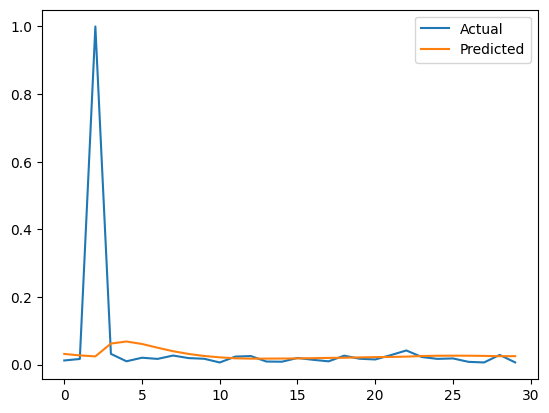

In [ ]:
    # Calculate the forecast error
    forecast_error = np.abs(y_test - y_pred.flatten())

    # Visualize results
    import matplotlib.pyplot as plt

    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.legend()
    plt.show()


In [ ]:
# Calculate anomaly threshold using Bollinger Bands
mean_error = np.mean(forecast_error)
std_error = np.std(forecast_error)
threshold = mean_error + 3 * std_error

anomalies = forecast_error > threshold
print(f"Total anomalies detected: {np.sum(anomalies)}")


Total anomalies detected: 30


In [ ]:
from scipy.stats import mannwhitneyu

# Split into anomalies and normal based on the threshold
group_anomalies = forecast_error[anomalies]
group_normal = forecast_error[~anomalies]

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(group_anomalies, group_normal)
print(f"Mann-Whitney U Test Statistic: {stat}, P-value: {p_value}")


Mann-Whitney U Test Statistic: 26100.0, P-value: 1.143352856769428e-20


ARIMA RMSE: 97102079008.57376, MAE: 93503630327.50897
LSTM RMSE: 273176.1314284132, MAE: 70398.3311581626


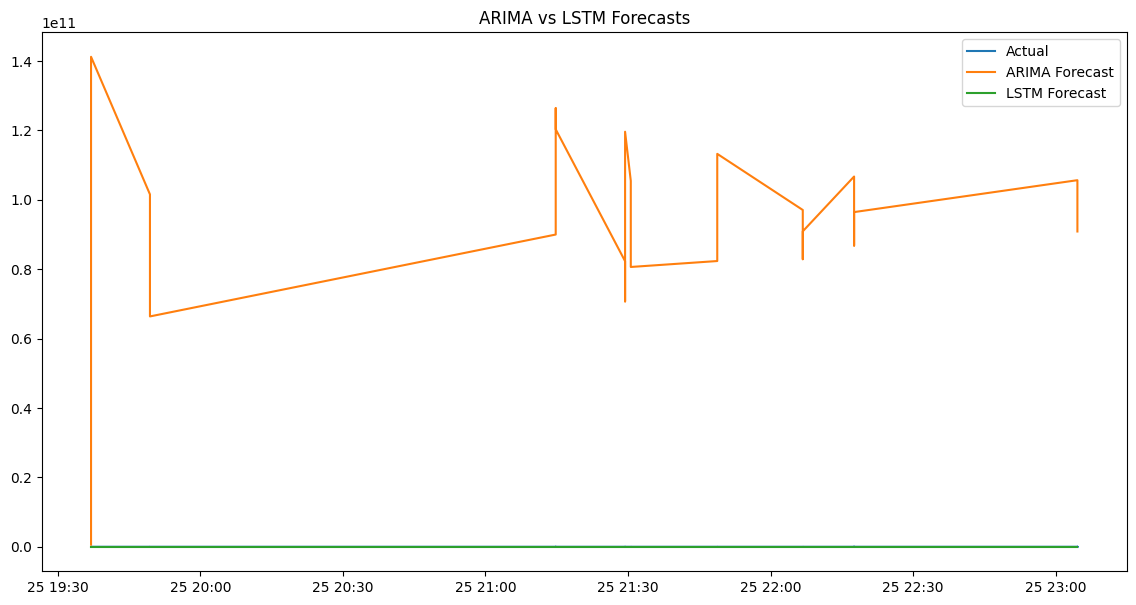

ARIMA Anomalies Detected: 0
LSTM Anomalies Detected: 30
Mann-Whitney U Test Statistic: [30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.
 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.], P-value: [0.06451613 0.06451613 0.06451613 0.06451613 0.06451613 0.06451613
 0.06451613 0.06451613 0.06451613 0.06451613 0.06451613 0.06451613
 0.06451613 0.06451613 0.06451613 0.06451613 0.06451613 0.06451613
 0.06451613 0.06451613 0.06451613 0.06451613 0.06451613 0.06451613
 0.06451613 0.06451613 0.06451613 0.06451613 0.06451613 0.06451613]
Fail to reject the null hypothesis - No significant difference in errors


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Assuming the trained ARIMA and LSTM models are already present in the script
# ARIMA forecast on the test data
arima_forecast = model_fit.forecast(steps=len(test_data))

# Inverse transform ARIMA predictions (if needed)
arima_forecast = scaler.inverse_transform(arima_forecast.values.reshape(-1, 1))

# LSTM predictions are already obtained in `y_pred`
# Inverse transform LSTM predictions
lstm_pred_inv = scaler.inverse_transform(y_pred)

# Calculate metrics for ARIMA
arima_rmse = np.sqrt(mean_squared_error(test_data, arima_forecast))
arima_mae = mean_absolute_error(test_data, arima_forecast)

# Calculate metrics for LSTM
lstm_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), lstm_pred_inv))
lstm_mae = mean_absolute_error(scaler.inverse_transform(y_test), lstm_pred_inv)

print(f"ARIMA RMSE: {arima_rmse}, MAE: {arima_mae}")
print(f"LSTM RMSE: {lstm_rmse}, MAE: {lstm_mae}")

# Plot actual vs predicted for ARIMA and LSTM
plt.figure(figsize=(14, 7))
plt.plot(df.index[-30:], test_data, label='Actual')
plt.plot(df.index[-30:], arima_forecast, label='ARIMA Forecast')
plt.plot(df.index[-30:], lstm_pred_inv, label='LSTM Forecast')
plt.legend()
plt.title('ARIMA vs LSTM Forecasts')
plt.show()

# Anomaly detection
arima_errors = np.abs(test_data - arima_forecast.flatten())
lstm_errors = np.abs(scaler.inverse_transform(y_test) - lstm_pred_inv.flatten())

# Set anomaly detection thresholds
arima_threshold = arima_errors.mean() + 3 * arima_errors.std()
lstm_threshold = lstm_errors.mean() + 3 * lstm_errors.std()

# Detect anomalies
arima_anomalies = arima_errors > arima_threshold
lstm_anomalies = lstm_errors > lstm_threshold

print(f"ARIMA Anomalies Detected: {np.sum(arima_anomalies)}")
print(f"LSTM Anomalies Detected: {np.sum(lstm_anomalies)}")

# Perform Mann-Whitney U Test
stat, p_value = mannwhitneyu(arima_errors, lstm_errors, alternative='two-sided')  # Explicitly set alternative
print(f"Mann-Whitney U Test Statistic: {stat}, P-value: {p_value}")

# Interpretation of Mann-Whitney U Test
alpha = 0.05
#Check if p_value is an array. If so, use any() or all() based on your use case
if isinstance(p_value, np.ndarray):
  if p_value.any() < alpha:  # Use any() if you want to check if any p-value is less than alpha
      print("Reject the null hypothesis - Significant difference in errors")
  else:
      print("Fail to reject the null hypothesis - No significant difference in errors")
else:
  if p_value < alpha:  # If p_value is a single value, compare directly
    print("Reject the null hypothesis - Significant difference in errors")
  else:
    print("Fail to reject the null hypothesis - No significant difference in errors")

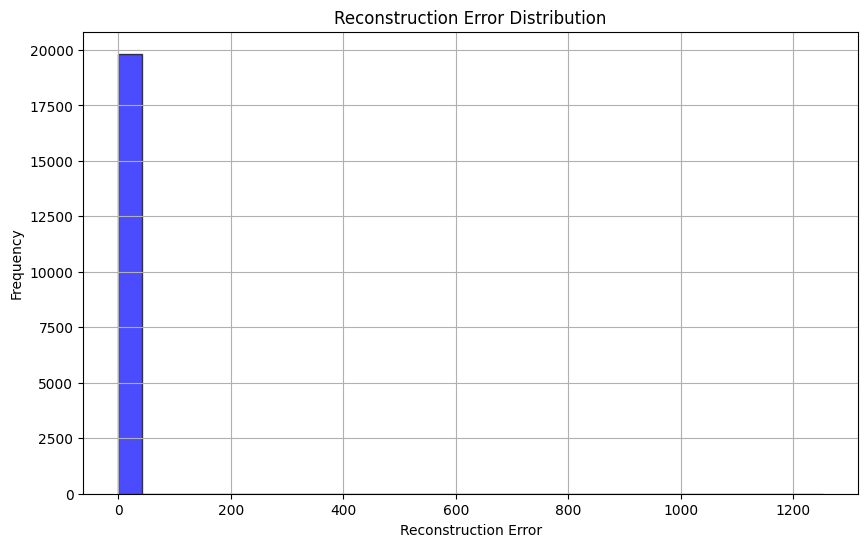

Reconstruction error saved to reconstruction_error.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Preprocess the data: Standardize and handle missing values
data.fillna(data.mean(), inplace=True)  # Fill missing values with column means
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA for dimensionality reduction
n_components = 2  # Number of components to retain
pca = PCA(n_components=n_components)
data_reduced = pca.fit_transform(data_scaled)

# Reconstruct the data from the reduced representation
data_reconstructed = pca.inverse_transform(data_reduced)

# Calculate reconstruction error (mean squared error for each sample)
reconstruction_error = np.mean((data_scaled - data_reconstructed) ** 2, axis=1)

# Visualize the reconstruction error
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Optional: Save the reconstruction error to a file
output_file = 'reconstruction_error.xlsx'
pd.DataFrame({'Reconstruction Error': reconstruction_error}).to_excel(output_file, index=False)
print(f"Reconstruction error saved to {output_file}")


# Define the LSTM Model Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(window_size, 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

# Train the LSTM Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Split data into training and validation sets
split = int(len(X) * 0.8)
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', save_best_only=True)  # Updated extension

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)


Epoch 1/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - loss: 1.3380e-04 - val_loss: 1.9128e-06
Epoch 2/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 2.1445e-04 - val_loss: 2.9369e-07
Epoch 3/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - loss: 5.9660e-05 - val_loss: 3.7129e-07
Epoch 4/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 35s 43ms/step - loss: 1.2091e-04 - val_loss: 6.3053e-07
Epoch 5/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - loss: 2.6663e-04 - val_loss: 9.1633e-07
Epoch 6/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - loss: 1.6112e-04 - val_loss: 2.2952e-06
Epoch 7/50
496/496 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - loss: 2.8826e-04 - val_loss: 3.0063e-07


# Evaluate the LSTM Model

In [ ]:
# Evaluate on validation data
val_loss = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")

# Hyperparameter tuning can be done manually or with libraries like Optuna or GridSearch.


124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.8484e-07
Validation Loss: 2.936896521532617e-07


# Predict and Detect Anomalies

124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


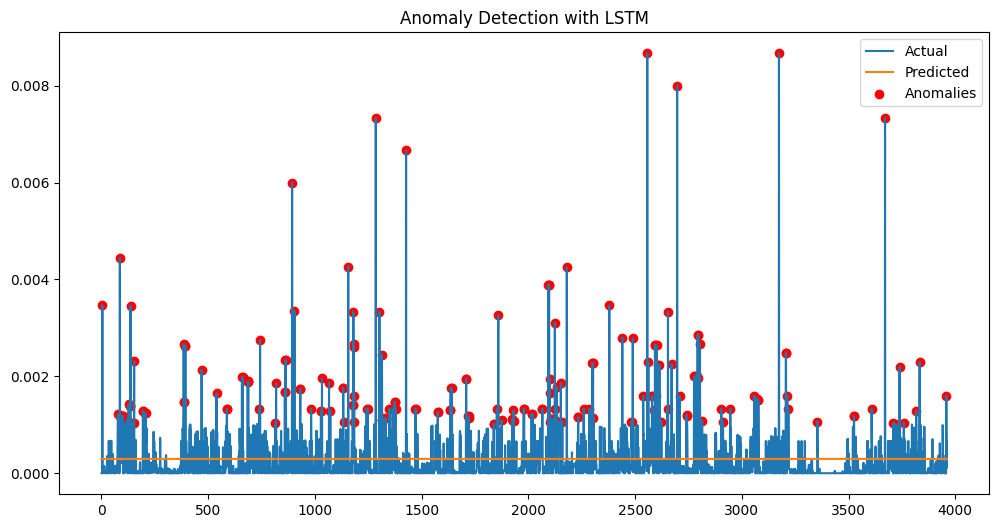

In [ ]:
import matplotlib.pyplot as plt

# Predict future values
predicted = model.predict(X_val)

# Calculate prediction errors
errors = np.abs(predicted.flatten() - y_val)

# Define an anomaly threshold (e.g., 95th percentile of errors)
threshold = np.percentile(errors, 95)
anomalies = errors > threshold

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(y_val, label="Actual")
plt.plot(predicted.flatten(), label="Predicted")
plt.scatter(np.arange(len(errors))[anomalies], y_val[anomalies], color='red', label='Anomalies')
plt.legend()
plt.title("Anomaly Detection with LSTM")
plt.show()


# Temporal Feature Engineering: Create features for time-series anomaly detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Recursive Feature Engineering


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_excel('/content/drive/MyDrive/Infosys Springboard Wash Trading Group 5/DATASET/Cleaned_NEAR_token_transaction_data.xlsx')

df['UnixTimestamp'] = pd.to_datetime(df['UnixTimestamp'], unit='s')

# Encode categorical features ('From', 'To', 'Method') using Label Encoding
encoder = LabelEncoder()
df['From'] = encoder.fit_transform(df['From'])
df['To'] = encoder.fit_transform(df['To'])
df['Method'] = encoder.fit_transform(df['Method'])

# Define features (X)
X = df.drop(columns=['Transaction Hash', 'DateTime (UTC)'])  # Remove irrelevant columns

# Scale numerical features (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Generate a pseudo-target using KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters based on domain knowledge
pseudo_target = kmeans.fit_predict(X_scaled)

# Perform Recursive Feature Elimination (RFE) using the pseudo-target
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=5)  # Select 5 features
X_rfe = rfe.fit_transform(X_scaled, pseudo_target)

# Get the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>)

# Analyze Temporal Attributes

In [ ]:
# Analyze key temporal attributes of the dataset
time_attributes = {
    "start_time": df.index.min(),
    "end_time": df.index.max(),
    "total_records": len(df),
    "time_span": df.index.max() - df.index.min(),
}
print(time_attributes)


{'start_time': Timestamp('2024-01-01 00:25:35'), 'end_time': Timestamp('2024-06-25 23:04:35'), 'total_records': 19836, 'time_span': Timedelta('176 days 22:39:00')}


# Compute Statistical Features

In [ ]:
# Import necessary functions
from scipy.stats import skew, kurtosis

# Function to compute rolling statistical features
def compute_stats(df, column, windows):
    stats = {}
    for window in windows:
        rolling = df[column].rolling(window=window)
        stats[f"mean_{window}"] = rolling.mean()
        stats[f"median_{window}"] = rolling.median()
        stats[f"std_{window}"] = rolling.std()
        stats[f"skewness_{window}"] = rolling.apply(skew, raw=True)
        stats[f"kurtosis_{window}"] = rolling.apply(kurtosis, raw=True)
    return pd.DataFrame(stats, index=df.index)

# Specify rolling windows and compute features
windows = [3, 5, 7]  # Example windows
statistical_features = compute_stats(df, 'Quantity', windows)
print(statistical_features.head())


/usr/local/lib/python3.11/dist-packages/pandas/core/window/rolling.py:1535: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return window_func(values, begin, end, min_periods)


                        mean_3    median_3      std_3  skewness_3  kurtosis_3  \
DateTime (UTC)                                                                  
2024-01-01 00:25:35        NaN         NaN        NaN         NaN         NaN   
2024-01-01 00:36:11        NaN         NaN        NaN         NaN         NaN   
2024-01-01 00:36:11  47.219049   36.593837  53.253626    0.351952        -1.5   
2024-01-01 00:36:11  70.015862  104.984275  60.567069   -0.707107        -1.5   
2024-01-01 00:51:59  38.436915   10.247435  57.855531    0.682613        -1.5   

                        mean_5   median_5      std_5  skewness_5  kurtosis_5  \
DateTime (UTC)                                                                 
2024-01-01 00:25:35        NaN        NaN        NaN         NaN         NaN   
2024-01-01 00:36:11        NaN        NaN        NaN         NaN         NaN   
2024-01-01 00:36:11        NaN        NaN        NaN         NaN         NaN   
2024-01-01 00:36:11        NaN  

# Generate Lagged Features

In [ ]:
# Generate lagged features
lagged_features = pd.DataFrame({
    f"lag_{lag}": df['Quantity'].shift(lag) for lag in range(1, 4)  # Lags 1 to 3
})
print(lagged_features.head())


                          lag_1       lag_2       lag_3
DateTime (UTC)                                         
2024-01-01 00:25:35         NaN         NaN         NaN
2024-01-01 00:36:11   36.593837         NaN         NaN
2024-01-01 00:36:11  104.984275   36.593837         NaN
2024-01-01 00:36:11    0.079035  104.984275   36.593837
2024-01-01 00:51:59  104.984275    0.079035  104.984275


# Decompose Time Series

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series (set period approximately to daily cycles or known periodicity)
decomposed = seasonal_decompose(df['Quantity'], model='additive', period=30)
decomposed_features = pd.DataFrame({
    "trend": decomposed.trend,
    "seasonal": decomposed.seasonal,
    "residual": decomposed.resid,
})
print(decomposed_features.head())


                     trend    seasonal  residual
DateTime (UTC)                                  
2024-01-01 00:25:35    NaN -161.540382       NaN
2024-01-01 00:36:11    NaN -146.466059       NaN
2024-01-01 00:36:11    NaN -141.747558       NaN
2024-01-01 00:36:11    NaN -101.213517       NaN
2024-01-01 00:51:59    NaN -143.623757       NaN


# Create Event-Based Features

In [ ]:
# Compute time differences and domain-specific features
df['time_diff'] = df.index.to_series().diff().dt.total_seconds()  # Time difference in seconds
event_features = pd.DataFrame({
    "is_high_quantity": df['Quantity'] > df['Quantity'].quantile(0.95)  # Top 5% values
})
print(df[['time_diff']].head())
print(event_features.head())


                     time_diff
DateTime (UTC)                
2024-01-01 00:25:35        NaN
2024-01-01 00:36:11      636.0
2024-01-01 00:36:11        0.0
2024-01-01 00:36:11        0.0
2024-01-01 00:51:59      948.0
                     is_high_quantity
DateTime (UTC)                       
2024-01-01 00:25:35             False
2024-01-01 00:36:11             False
2024-01-01 00:36:11             False
2024-01-01 00:36:11             False
2024-01-01 00:51:59             False


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import optuna
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras_tuner.tuners import RandomSearch
from pmdarima import auto_arima

# Load dataset
file_path = '/content/trans.xlsx'
data = pd.read_excel(file_path)

# Initial Data Inspection
print("Data Information:")
print(data.info())
print("First Few Rows of Data:")
print(data.head())

# Ensure the dataset contains numeric columns and preprocess accordingly
if 'irrelevant_column_name' in data.columns:  # Replace with actual irrelevant column name
    data = data.drop(['irrelevant_column_name'], axis=1)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

# Check if all columns are numeric now
data = data.select_dtypes(include=[np.number])

# Handle missing values
data = data.dropna()

# Separate features and target
if data.shape[1] < 2:
    raise ValueError("Dataset must contain at least one feature column and one target column.")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Engineering ###

# RFE (Recursive Feature Elimination)
rfe_model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=rfe_model, n_features_to_select=min(5, X_train.shape[1]))
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Permutation Importance
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
perm_importance = permutation_importance(rf_model, X_test, y_test)
print("Permutation Importance:", perm_importance.importances_mean)

# PCA
n_components = min(5, X_train.shape[1])  # Ensure we don't exceed the number of features
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# LDA
lda = LDA(n_components=min(1, len(np.unique(y)) - 1))  # n_classes - 1 for LDA
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Hash  19836 non-null  object        
 1   Blockno           19836 non-null  int64         
 2   UnixTimestamp     19836 non-null  int64         
 3   DateTime (UTC)    19836 non-null  datetime64[ns]
 4   From              19836 non-null  object        
 5   To                19836 non-null  object        
 6   Quantity          19836 non-null  float64       
 7   Method            19836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.2+ MB
None
First Few Rows of Data:
                                    Transaction Hash   Blockno  UnixTimestamp  \
0  0x27797428fc8aaf088cc707c8788b5d13580696418c79...  18909018     1704068735   
1  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070

In [ ]:
!pip install optuna
!pip install hyperopt
!pip install pmdarima
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.7 MB/s eta 0:00:00


# Hyperparameter Tuning

In [ ]:
!pip install optuna
!pip install hyperopt
!pip install pmdarima
!pip install keras-tuner
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import optuna
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras_tuner.tuners import RandomSearch
from pmdarima import auto_arima
from scipy.stats import mannwhitneyu

# Load Dataset
file_path = '/content/trans.xlsx'  # Update with the correct file path
data = pd.read_excel(file_path)

# Preprocessing (assume dataset has 'DateTime (UTC)' and 'Quantity' columns)
# Rename the timestamp column to 'timestamp' for consistency
data = data.rename(columns={'DateTime (UTC)': 'timestamp'})
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Ensure 'Quantity' column exists for ARIMA and LSTM
# Assuming your value column is named 'Quantity'
if 'Quantity' not in data.columns:
    raise ValueError("The dataset must contain a 'Quantity' column.")

# Split data
train_data, test_data = train_test_split(data['Quantity'], test_size=0.2, random_state=42)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.8 MB/s eta 0:00:00


In [ ]:
### 1. ARIMA Hyperparameter Tuning ###

# Random Search for ARIMA
def random_search_arima(train_data):
    random_results = []
    for i in range(20):  # Number of random combinations
        params = {
            'order': (np.random.randint(0, 5), np.random.randint(0, 2), np.random.randint(0, 5)),
            'seasonal_order': (np.random.randint(0, 2), np.random.randint(0, 2), np.random.randint(0, 2), 12),  # Assuming seasonality of 12
            'suppress_warnings': True,
            'trace': False,
            'error_action': 'ignore'  # Handle potential errors during fitting
        }
        try:
            model = auto_arima(train_data, **params)
            aic = model.aic()
            random_results.append((params, aic))
        except Exception as e:
            print(f"Error during ARIMA fitting: {e}")  # Log the error
            continue
    best_params = min(random_results, key=lambda x: x[1])
    return best_params

# Optuna for ARIMA
def objective_arima(trial):
    params = {
        'order': (trial.suggest_int('p', 0, 5), trial.suggest_int('d', 0, 2), trial.suggest_int('q', 0, 5)),
        'seasonal_order': (trial.suggest_int('P', 0, 2), trial.suggest_int('D', 0, 2), trial.suggest_int('Q', 0, 2), 12),
        'suppress_warnings': True,
        'trace': False,
        'error_action': 'ignore'
    }
    try:
        model = auto_arima(train_data, **params)
        return model.aic()
    except Exception as e:
        print(f"Error during ARIMA fitting: {e}")
        return float('inf')

study_arima = optuna.create_study(direction='minimize')
study_arima.optimize(objective_arima, n_trials=20)
print("Best ARIMA Parameters (Optuna):", study_arima.best_params)

[I 2025-01-20 11:38:09,729] A new study created in memory with name: no-name-19821d22-e07f-4168-bf3c-bd32cf0d5946
[I 2025-01-20 11:38:09,740] Trial 0 finished with value: inf and parameters: {'p': 5, 'd': 2, 'q': 1, 'P': 1, 'D': 0, 'Q': 0}. Best is trial 0 with value: inf.
[I 2025-01-20 11:38:09,746] Trial 1 finished with value: inf and parameters: {'p': 5, 'd': 2, 'q': 1, 'P': 1, 'D': 2, 'Q': 0}. Best is trial 0 with value: inf.
[I 2025-01-20 11:38:09,751] Trial 2 finished with value: inf and parameters: {'p': 2, 'd': 1, 'q': 4, 'P': 0, 'D': 2, 'Q': 2}. Best is trial 0 with value: inf.
[I 2025-01-20 11:38:09,759] Trial 3 finished with value: inf and parameters: {'p': 1, 'd': 1, 'q': 2, 'P': 1, 'D': 2, 'Q': 2}. Best is trial 0 with value: inf.
[I 2025-01-20 11:38:09,765] Trial 4 finished with value: inf and parameters: {'p': 2, 'd': 2, 'q': 3, 'P': 0, 'D': 2, 'Q': 1}. Best is trial 0 with value: inf.
[I 2025-01-20 11:38:09,769] Trial 5 finished with value: inf and parameters: {'p': 4, 

Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined


[I 2025-01-20 11:38:09,965] Trial 13 finished with value: inf and parameters: {'p': 0, 'd': 1, 'q': 1, 'P': 2, 'D': 0, 'Q': 0}. Best is trial 0 with value: inf.
[I 2025-01-20 11:38:10,006] Trial 14 finished with value: inf and parameters: {'p': 3, 'd': 2, 'q': 0, 'P': 1, 'D': 1, 'Q': 0}. Best is trial 0 with value: inf.
[I 2025-01-20 11:38:10,048] Trial 15 finished with value: inf and parameters: {'p': 5, 'd': 1, 'q': 2, 'P': 1, 'D': 1, 'Q': 0}. Best is trial 0 with value: inf.
[I 2025-01-20 11:38:10,086] Trial 16 finished with value: inf and parameters: {'p': 4, 'd': 2, 'q': 1, 'P': 2, 'D': 0, 'Q': 1}. Best is trial 0 with value: inf.
[I 2025-01-20 11:38:10,141] Trial 17 finished with value: inf and parameters: {'p': 3, 'd': 0, 'q': 2, 'P': 1, 'D': 1, 'Q': 0}. Best is trial 0 with value: inf.


Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined


[I 2025-01-20 11:38:10,199] Trial 18 finished with value: inf and parameters: {'p': 5, 'd': 2, 'q': 0, 'P': 2, 'D': 1, 'Q': 1}. Best is trial 0 with value: inf.
[I 2025-01-20 11:38:10,253] Trial 19 finished with value: inf and parameters: {'p': 4, 'd': 1, 'q': 3, 'P': 1, 'D': 2, 'Q': 0}. Best is trial 0 with value: inf.


Error during ARIMA fitting: name 'train_data' is not defined
Error during ARIMA fitting: name 'train_data' is not defined
Best ARIMA Parameters (Optuna): {'p': 5, 'd': 2, 'q': 1, 'P': 1, 'D': 0, 'Q': 0}


In [ ]:
### 2. LSTM Hyperparameter Tuning ###

# Prepare LSTM data
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split  # Import for data splitting


# Assuming 'data' is your DataFrame containing the time series data
# and 'Quantity' is the column you want to predict
# Split data into training and testing sets
train_data, test_data = train_test_split(data['Quantity'], test_size=0.2, random_state=42)


scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train_data.values.reshape(-1, 1))

window_size = 10  # Adjust window size as needed
generator = TimeseriesGenerator(scaled_data, scaled_data, length=window_size, batch_size=32)  # Adjust batch size

# Keras Tuner for LSTM
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
                   activation='relu', input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    return model

tuner = RandomSearch(
    build_lstm_model,
    objective='mse',
    max_trials=5,  # Adjust the number of trials
    executions_per_trial=1,
    directory='lstm_tuning_dir',
    project_name='lstm_tuning'
)

# Search for best hyperparameters
tuner.search(generator, epochs=10, validation_data=None)  # Adjust epochs, add validation_data if available
best_hps_lstm = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best LSTM Hyperparameters (Keras Tuner):", best_hps_lstm.values)

# Hyperopt for LSTM
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

def lstm_hyperopt(params):
    model = Sequential()
    model.add(LSTM(units=int(params['units']), activation='relu', input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])
    history = model.fit(generator, epochs=5, verbose=0)  # Adjust epochs
    return {'loss': history.history['loss'][-1], 'status': STATUS_OK}

space_lstm = {
    'units': hp.quniform('units', 32, 128, 32)
}

trials_lstm = Trials()
best_lstm_hyperopt = fmin(lstm_hyperopt, space_lstm, algo=tpe.suggest, max_evals=5, trials=trials_lstm)  # Adjust max_evals
print("Best LSTM Hyperopt Parameters:", best_lstm_hyperopt)

Trial 4 Complete [00h 00m 49s]
mse: 0.0001372782135149464

Best mse So Far: 0.0001369551318930462
Total elapsed time: 00h 04m 26s
Best LSTM Hyperparameters (Keras Tuner): {'units': 32}
100%|██████████| 5/5 [02:12<00:00, 26.51s/trial, best loss: 0.0001375058782286942]
Best LSTM Hyperopt Parameters: {'units': 96.0}


In [ ]:
### 3. Mann-Whitney U Test for Anomaly Detection ###
# Import mannwhitneyu within this cell
from scipy.stats import mannwhitneyu

# Create random samples for Mann-Whitney U Test
sample1 = train_data.sample(100, random_state=42)
sample2 = test_data.sample(100, random_state=42)

# Perform the Mann-Whitney U Test
stat, p_value = mannwhitneyu(sample1, sample2, alternative='two-sided')

# Interpretation
if p_value < 0.05:
    print("Significant difference detected (p-value =", p_value, ")")
else:
    print("No significant difference detected (p-value =", p_value, ")")

# Hyperparameter tuning for Mann-Whitney (can adjust sample size or other parameters dynamically)
def mann_whitney_hyperopt(params):
    sample_size = int(params['sample_size'])
    sample1 = train_data.sample(sample_size, random_state=42)
    sample2 = test_data.sample(sample_size, random_state=42)
    stat, p_value = mannwhitneyu(sample1, sample2, alternative='two-sided')
    return {'loss': -p_value, 'status': STATUS_OK}

space_mann_whitney = {
    'sample_size': hp.quniform('sample_size', 50, 200, 10)
}

trials_mann = Trials()
best_mann_params = fmin(mann_whitney_hyperopt, space_mann_whitney, algo=tpe.suggest, max_evals=10, trials=trials_mann)
print("Best Mann-Whitney Parameters:", best_mann_params)

#Expected Outputs
#ARIMA: Best parameters for ARIMA using Random Search and Optuna.
#LSTM: Best hyperparameters for LSTM using Keras Tuner and Hyperopt.
#Mann-Whitney: p-value and significance detection.

No significant difference detected (p-value = 0.6087246579672975 )
100%|██████████| 10/10 [00:00<00:00, 59.91trial/s, best loss: -0.9520440396416079]
Best Mann-Whitney Parameters: {'sample_size': 170.0}


# isolation forest and LOF for 3 models

In [ ]:
import pandas as pd

# Load your dataset (replace with your file path if needed)
file_path = '/content/trans.xlsx'
data = pd.ExcelFile(file_path)

# Extract the relevant sheet (if multiple sheets exist)
data_df = data.parse(data.sheet_names[0])

# Select necessary columns
cleaned_data = data_df[['UnixTimestamp', 'Quantity']].dropna()

# Convert UnixTimestamp to datetime format
cleaned_data['DateTime'] = pd.to_datetime(cleaned_data['UnixTimestamp'], unit='s')

# Sort by DateTime for time-series analysis
cleaned_data = cleaned_data.sort_values(by='DateTime').reset_index(drop=True)

print(cleaned_data.head())  # Preview the cleaned dataset


from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Prepare the 'Quantity' data for outlier detection
quantities = cleaned_data['Quantity'].values.reshape(-1, 1)

# Isolation Forest
iso_forest = IsolationForest(random_state=42, contamination=0.05)  # 5% contamination level
cleaned_data['IsoForest_Outlier'] = iso_forest.fit_predict(quantities)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
cleaned_data['LOF_Outlier'] = lof.fit_predict(quantities)

# Map results: -1 indicates an outlier, 1 indicates inlier
cleaned_data['IsoForest_Outlier'] = cleaned_data['IsoForest_Outlier'].map({-1: 'Outlier', 1: 'Inlier'})
cleaned_data['LOF_Outlier'] = cleaned_data['LOF_Outlier'].map({-1: 'Outlier', 1: 'Inlier'})

# Display the dataset with outlier detection results
print(cleaned_data.head())


   UnixTimestamp    Quantity            DateTime
0     1704068735   36.593837 2024-01-01 00:25:35
1     1704069371  104.984275 2024-01-01 00:36:11
2     1704069371    0.079035 2024-01-01 00:36:11
3     1704069371  104.984275 2024-01-01 00:36:11
4     1704070319   10.247435 2024-01-01 00:51:59
   UnixTimestamp    Quantity            DateTime IsoForest_Outlier LOF_Outlier
0     1704068735   36.593837 2024-01-01 00:25:35            Inlier      Inlier
1     1704069371  104.984275 2024-01-01 00:36:11            Inlier      Inlier
2     1704069371    0.079035 2024-01-01 00:36:11            Inlier      Inlier
3     1704069371  104.984275 2024-01-01 00:36:11            Inlier      Inlier
4     1704070319   10.247435 2024-01-01 00:51:59            Inlier      Inlier


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

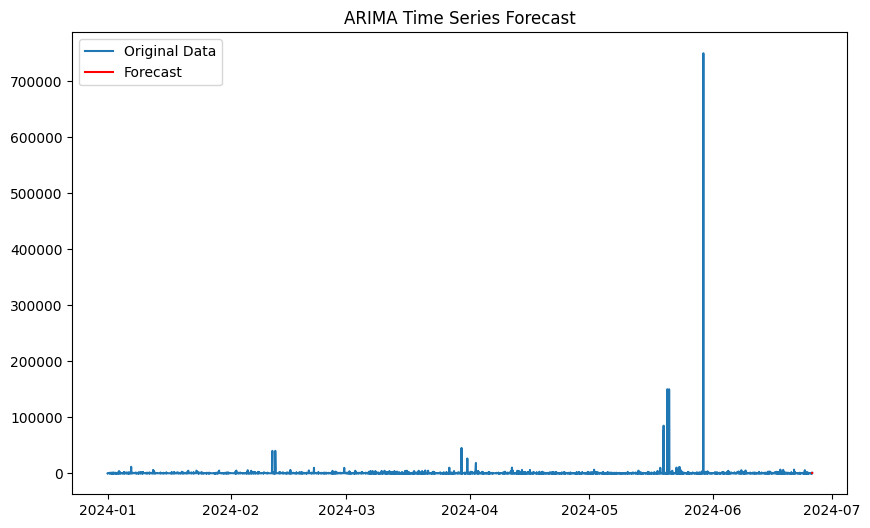

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare the time-series data for ARIMA
time_series = cleaned_data[['DateTime', 'Quantity']].set_index('DateTime')

# Fit ARIMA model (parameters can be fine-tuned later, here using (1,1,1) as a starting point)
arima_model = ARIMA(time_series, order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast next 10 steps
forecast_steps = 10
forecast = arima_result.forecast(steps=forecast_steps)

# Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original Data')
plt.plot(pd.date_range(time_series.index[-1], periods=forecast_steps + 1, freq='T')[1:],
         forecast, label='Forecast', color='red')
plt.title('ARIMA Time Series Forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 6.8617e-05
Epoch 2/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 5.1985e-05
Epoch 3/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 4.4411e-05
Epoch 4/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - loss: 1.8726e-04
Epoch 5/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 9.3652e-05
Epoch 6/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 5.1404e-05
Epoch 7/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 1.0473e-04
Epoch 8/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 6.9077e-05
Epoch 9/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 2.3309e-05
Epoch 10/10
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 1.0509e-04
620/620 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


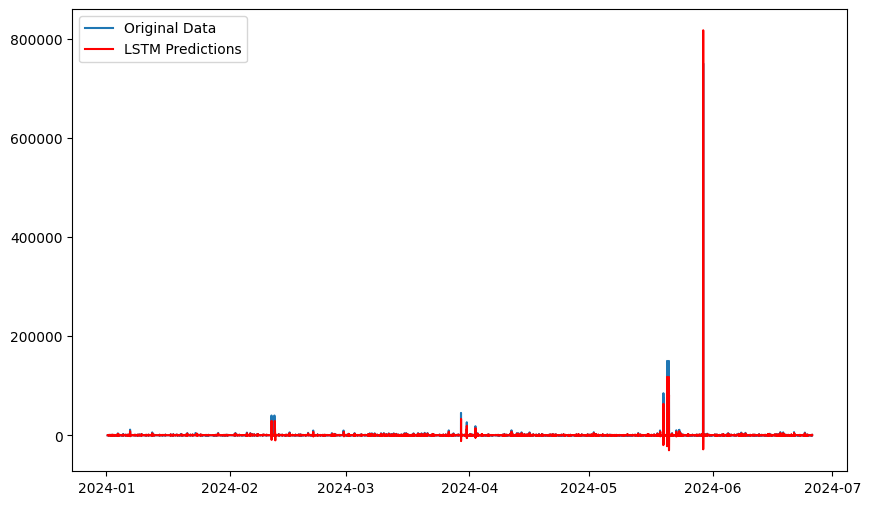

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(time_series['Quantity'].values.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_dataset(scaled_data, time_steps)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM input

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, batch_size=16, epochs=10, verbose=1)

# Forecast
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_series.index[time_steps:], scaler.inverse_transform(scaled_data[time_steps:]), label='Original Data')
plt.plot(time_series.index[time_steps:], predictions, label='LSTM Predictions', color='red')
plt.legend()
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

# Example data: split 'Quantity' into two groups (e.g., based on a condition)
group1 = cleaned_data[cleaned_data['IsoForest_Outlier'] == 'Inlier']['Quantity']
group2 = cleaned_data[cleaned_data['IsoForest_Outlier'] == 'Outlier']['Quantity']

# Perform the Mann-Whitney U Test
stat, p = mannwhitneyu(group1, group2, alternative='two-sided')

# Output the test results
print(f"Mann-Whitney U Test Statistic: {stat}")
print(f"P-value: {p}")


Mann-Whitney U Test Statistic: 41168.0
P-value: 0.0
